In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Análise Preditiva Avançada, Parte II (Deep Learning)

## Trabalho em Grupo
- **Curso:** FGV MBA - Business Analytics e Big Data
- **Disciplina:** Análise Preditiva Avançada
- **Professor:** Gustavo Mirapalheta
- **Tarefa:** Detecção de pneumonia em imagens de raio X

## Alunos
|Github|Kaggle|Nome|Matricula|E-mail|
|---|---|---|---|---|
|<a href="https://github.com/DanielFCampos"><img src="https://avatars2.githubusercontent.com/u/31582602?s=460&v=4" title="DanielFCampos" width="40" height="40"></a>|<a href="https://www.kaggle.com/danielferrazcampos"><img src="https://storage.googleapis.com/kaggle-avatars/images/3508055-kg.png" title="DanielFCampos" width="40" height="40"></a>|Daniel Campos|A57635769|[daniel.ferraz.campos@gmail.com](daniel.ferraz.campos@gmail.com)|
|<a href="https://github.com/ldaniel"><img src="https://avatars2.githubusercontent.com/u/205534?s=460&v=4" title="ldaniel" width="40" height="40"></a>|<a href="https://www.kaggle.com/leandrodaniel"><img src="https://storage.googleapis.com/kaggle-avatars/images/3415144-gr.jpg" title="ldaniel" width="40" height="40"></a>|Leandro Daniel|A57622988|[contato@leandrodaniel.com](contato@leandrodaniel.com)|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|<a href="https://www.kaggle.com/rodrigonca"><img src="https://storage.googleapis.com/kaggle-avatars/images/3511253-kg.png" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|
|<a href="https://github.com/ygorlima1"><img src="https://avatars2.githubusercontent.com/u/52429828?s=460&v=4" title="ygorlima1" width="40" height="40"></a>|<a href="https://www.kaggle.com/ygorlima1"><img src="https://storage.googleapis.com/kaggle-avatars/images/3427786-kg.jpg" title="ygorlima1" width="40" height="40"></a>|Ygor Lima|A57549661|[ygor_redesocial@hotmail.com](ygor_redesocial@hotmail.com)|

## Enunciado

**Trabalho em grupo de 3 a 4 alunos envolvendo técnicas de aprendizado supervisionado de máquina com Deep learning.**

### Possíveis trabalhos
- Classificação ou Previsão, Dados Numéricos ou Categóricos, Estilo de problema similar às Regressões Logística ou Linear;
- Principalmente no caso de processamento de texto em linguagem natural;
- Classificação de imagens com Redes Convolutivas;
- Previsão de Texto com Redes Sequenciais;
- Geração de conteúdo (música por exemplo) com redes Auto-Generativas;
- Mix de estilos artísticos com Redes Convolutivas / Auto-Generativas.

### Material a ser entregue
- Se fizer em Python (recomendado): Jupyter Notebook com base e resultados (no caso de dados não submetidos à confidencialidade) ou apenas o Jupyter Notebook (com algumas referências de dados que possam "validar" o modelo de rede neural entregue).
- Se fizer em R: Entregar a base de dados e o Rmarkdown. As bibliotecas de machine ;learning mais utilizadas (scikit-learn, tensorflow e keras) estão disponíveis também no R, porém com um print-end. É necessário instalar o Python para executalas.

### Data de entrega: 25/05

## Escolha da Análise e Abordagem do Grupo

Optamos por desenvolver, em Python, uma Rede Neural Convolutiva para classificar imagens de raio-x com ou sem pneumonia.

Dentro da área de estudo do Deep Learning, temos a chamada CNN (do inglês, Convolutional Neural Network) como um tipo específico de rede neural normalmente utilizada para classificação de imagens.

Uma imagem preta e branca (grayscale) é representada como uma matrix 2D, em que cada posição da matrix representa um pixel da imagem. Os valores para cada elemento variam entre 0 (preto) até 255 (branco). Já uma imagem colorida, é normalmente representada por uma matrix 3D de forma que seja possível armazenar uma combinação das cores vermelho, verde e azul (RGB do inglês). Neste contexto, uma CNN pode ser dividida em duas partes: extração de características (Conv, Padding, Relu, Pooling) e uma rede neural tradicional.

Matematicamente, uma convolução é uma operação linear que a partir de duas funções, gera uma terceira (normalmente chamada de feature map). No contexto de imagens, podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada.

Durante o desenvolvimento deste trabalho, procuramos aplicar os conceitos de CNN a imagens de raios X de tórax de pacientes com o objetivo de identificar a presença de pneumonia.

# Desenvolvimento e Análise

## Descrição do Dataset Utilizado

### **Exemplos ilustrativos de raios X de tórax em pacientes com pneumonia**

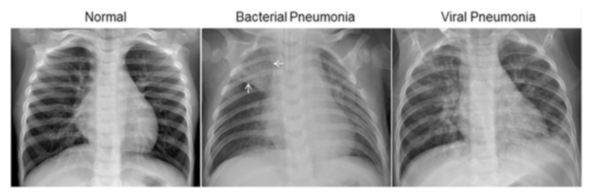


A radiografia normal do tórax (painel esquerdo) mostra pulmões limpos, sem áreas de opacificação anormal na imagem. A pneumonia bacteriana (média) geralmente exibe uma consolidação lobar focal, neste caso no lobo superior direito (setas brancas), enquanto a pneumonia viral (direita) se manifesta com um padrão mais difuso de 'intersticial' em ambos os pulmões.

### **Estrutura dos Dados**

O conjunto de dados está organizado em 3 pastas (Treino, Teste, Validação) e contém subpastas para cada categoria de imagem (Pneumonia / Normal).

Existem 5.883 imagens de raios-X (JPEG) e 2 categorias (Pneumonia / Normal).

As imagens de radiografia de tórax (ântero-posterior) foram selecionadas a partir de cortes de pacientes pediátricos de um a cinco anos no Centro Médico de Mulheres e Crianças de Guangzhou, Guangzhou. 

Todas as radiografias de tórax foram realizadas como parte dos cuidados clínicos de rotina dos pacientes.

Para a análise de imagens de raio-x do tórax, todas as imagens rastreadas para controle de qualidade, removendo todas as imagens de baixa qualidade ou ilegíveis. 

Os diagnósticos para as imagens foram classificados por dois médicos especialistas.

## Libraries Utilizadas para Desenvolvimento da Análise

In [2]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import cv2 as cv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


## Data Preparation

A preparação de dados é o ato de manipular e transformar dados brutos em uma forma que pode ser analisada por algoritmos de Deep Learning.

Para este projeto vamos criar uma função que faz a leitura das imagens em uma matriz quadrada de tamanho 256 x 256 em greyscale, com o respectivo label indicando se a radiografia é de um paciente NORMAL (0) ou com PNEUMONIA (1).


In [3]:
image_size = 256
labels = ['NORMAL', 'PNEUMONIA']

def get_data(data_dir):
        
    images = []
    
# cria uma lista com o index de cada label com base no nome da raíz do diretório informado.
    for label in labels:
        dir = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
# percorre todas as imagens presentes no diretório, converte para grey_sacale e faz o resizing das imagens.
        for image in os.listdir(dir):    
            image_read = cv.imread(os.path.join(dir,image), cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read, (image_size, image_size))
            images.append([image_resized, class_num])

    return np.array(images)

train       = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/train')
test        = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/test')
validation  = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/val')


Na sequência avaliamos as quantidades de observações em cada dataset (Treino, Teste e Validação).

In [4]:
print('\nQuantidade de imagens no dataset de treino:\t', len(train), 
      '\tcom o fomato: ', train.shape, 
      '\nNORMAL:', np.count_nonzero(train[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(train[:,1] == 1))

print('\nQuantidade de imagens no dataset de teste:\t', len(test), 
      '\tcom o fomato: ', test.shape,
      '\nNORMAL:', np.count_nonzero(test[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(test[:,1] == 1))

print('\nQuantidade de imagens no dataset de validação:\t', len(validation), 
      '\tcom o fomato: ', validation.shape,
      '\nNORMAL:', np.count_nonzero(validation[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(validation[:,1] == 1))


Quantidade de imagens no dataset de treino:	 5216 	com o fomato:  (5216, 2) 
NORMAL: 1341 	PNEUMONIA: 3875

Quantidade de imagens no dataset de teste:	 624 	com o fomato:  (624, 2) 
NORMAL: 234 	PNEUMONIA: 390

Quantidade de imagens no dataset de validação:	 16 	com o fomato:  (16, 2) 
NORMAL: 8 	PNEUMONIA: 8


Agora podemos observar um conjunto de imagens presentes no dataset de treinamento.

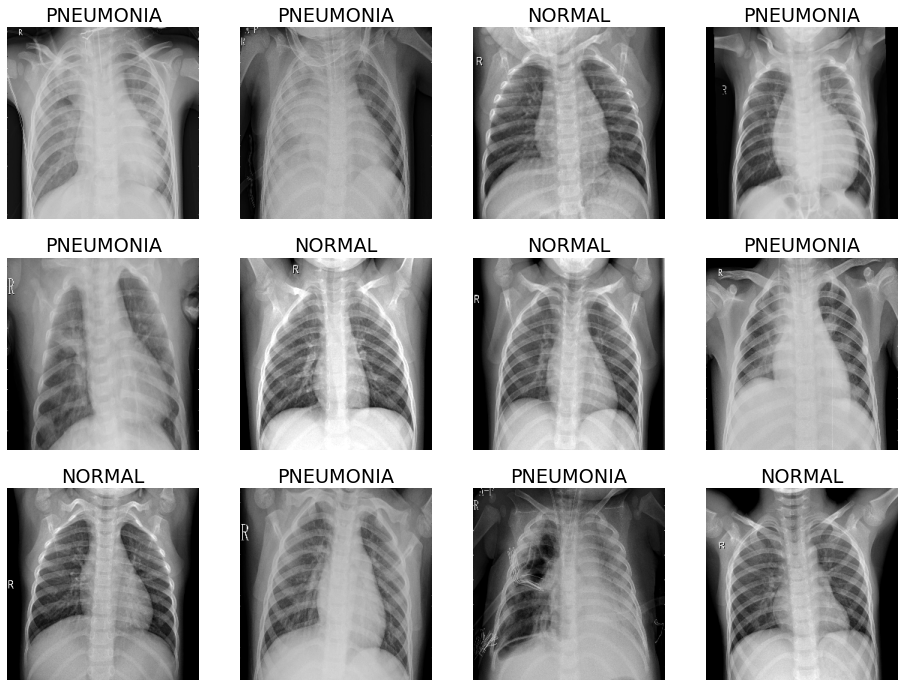

In [5]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (16, 12))
columns = 4
rows = 3

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(train))
    img = train[rnd][0]  
    fig.add_subplot(rows, columns, i)
    plt.title(labels[train[rnd][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()

### Reshaping dos Tensores

Agora necessitamos fazer o reshaping das dimensões dos datasets para serem processados pelos algoritmos de Deep Learning.

Iniciamos por extrair os componentes dos datasets de Treino e Teste carregados anteriormente e consolidados em um único dataset que será separado em datasets de treino e teste.

In [6]:
x_features = []
y_labels = []

for feature, label in train:
    x_features.append(feature)
    y_labels.append(label)
    
for feature, label in test:
    x_features.append(feature)
    y_labels.append(label)
    
for feature, label in validation:
    x_features.append(feature)
    y_labels.append(label)

Abaixo realizamos o reshape dos dados para utilizá-los no treinamento do modelo.

In [7]:
x_features = np.array(x_features).reshape(-1, image_size, image_size, 1)
y_labels = np.array(y_labels)
y_labels = np.expand_dims(y_labels, axis =1)

Finalmente realizamos a separação entre base de teste e treino, na proporção de 80% treinamento e 20% teste.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_features, 
                                                    y_labels,
                                                    stratify = y_labels,
                                                    test_size = 0.2, 
                                                    random_state = 2)

In [9]:
print('\nnovo formato do tensor de features de treinamento:\t', x_train.shape, 
      '\nquantidade:\t', len(x_train), 
      '\tNORMAL:', np.count_nonzero(y_train == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_train == 1))

print('\nnovo formato do tensor de labels de treinamento:\t', y_train.shape, 
      '\nquantidade:\t', len(y_train),
      '\tNORMAL:', np.count_nonzero(y_train == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_train == 1))

print('\nnovo formato do tensor de features de teste:\t\t', x_test.shape, 
      '\nquantidade:\t', len(x_test),
      '\tNORMAL:', np.count_nonzero(y_test == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_test == 1))

print('\nnovo formato do tensor de labels de teste:\t\t', y_test.shape, 
      '\nquantidade:\t', len(y_test),
      '\tNORMAL:', np.count_nonzero(y_test == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_test == 1))


novo formato do tensor de features de treinamento:	 (4684, 256, 256, 1) 
quantidade:	 4684 	NORMAL: 1266 	PNEUMONIA 3418

novo formato do tensor de labels de treinamento:	 (4684, 1) 
quantidade:	 4684 	NORMAL: 1266 	PNEUMONIA 3418

novo formato do tensor de features de teste:		 (1172, 256, 256, 1) 
quantidade:	 1172 	NORMAL: 317 	PNEUMONIA 855

novo formato do tensor de labels de teste:		 (1172, 1) 
quantidade:	 1172 	NORMAL: 317 	PNEUMONIA 855


Para finalizar dividimos as matrizes de features por 255 para normalizar os dados.

In [10]:
x_train = x_train / 255
x_test  = x_test  / 255

## Definição da Arquitetura da Rede Neural

### Criando os Modelos

Primeiramente criamos uma Rede Neural simples em convuluções.

In [11]:
i = Input(x_train.shape[1:])

a = Flatten()(i)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.4)(a)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.3)(a)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.1)(a)

a = Dense(1, activation = 'sigmoid')(a)

model_NN = Model(i,a)

Adicionalmente criamos uma Rede Neural com convuluções para compararmos os resultados com o modelo mais simples acima.

In [12]:
i = Input(x_train.shape[1:])

b = Conv2D(32, (3,3), activation ='relu', padding = 'same')(i)
b = BatchNormalization()(b)
b = Conv2D(32, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(64, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(64, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(128, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(128, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(256, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(256, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Flatten()(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.4)(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.3)(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.1)(b)

b = Dense(1, activation = 'sigmoid')(b)

model_CNN = Model(i, b)

### Compilando e Visualizando a Arquitetura dos Modelos

### Rede Neural Simples

In [13]:
model_NN.compile(optimizer = 'SGD',
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model_NN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656

### Convolutional Neural Network

In [14]:
model_CNN.compile(optimizer = 'SGD',
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model_CNN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      1849

### Data Augmentation

Data augmentation é uma estratégia que permite que se aumente significativamente a diversidade de dados disponíveis para treinamento de modelos de machine learning, sem realmente coletar novos dados. Técnicas de data augmentation, como corte, preenchimento e inversão horizontal, são comumente usadas para treinar grandes redes neurais.

In [15]:
batch_size = 16

train_gen = ImageDataGenerator(rotation_range = 10,
                               horizontal_flip = True,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1.,
                               zoom_range = 0.2,
                               fill_mode = 'nearest',
                               cval = 0)

train_generator_NN = train_gen.flow(x_train, y_train, batch_size)
train_generator_CNN = train_gen.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

checkpoint_NN = ModelCheckpoint('model_NN.h5', 
                                monitor = 'val_loss', 
                                verbose = 1, 
                                save_best_only = True, 
                                mode = 'auto')

checkpoint_CNN = ModelCheckpoint('model_CNN.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 1, 
                                 save_best_only = True, 
                                 mode = 'auto')


## Treinamento dos Modelos

Primeiramente iniciamos com o modelo de Rede Neural simples.

In [16]:
epochs = 80

In [17]:
history_NN = model_NN.fit(train_generator_NN, 
                          validation_data = (x_test, y_test), 
                          steps_per_epoch = steps_per_epoch, 
                          epochs = epochs,
                          callbacks = [checkpoint_NN])

Train for 292 steps, validate on 1172 samples
Epoch 1/80
291/292 [============================>.] - ETA: 0s - loss: 0.6105 - accuracy: 0.7156
Epoch 00001: val_loss improved from inf to 0.61418, saving model to model_NN.h5
292/292 [==============================] - 21s 73ms/step - loss: 0.6107 - accuracy: 0.7151 - val_loss: 0.6142 - val_accuracy: 0.7295
Epoch 2/80
291/292 [============================>.] - ETA: 0s - loss: 0.5646 - accuracy: 0.7304
Epoch 00002: val_loss improved from 0.61418 to 0.59474, saving model to model_NN.h5
292/292 [==============================] - 21s 73ms/step - loss: 0.5650 - accuracy: 0.7301 - val_loss: 0.5947 - val_accuracy: 0.7295
Epoch 3/80
291/292 [============================>.] - ETA: 0s - loss: 0.5778 - accuracy: 0.7294
Epoch 00003: val_loss improved from 0.59474 to 0.59228, saving model to model_NN.h5
292/292 [==============================] - 20s 69ms/step - loss: 0.5779 - accuracy: 0.7292 - val_loss: 0.5923 - val_accuracy: 0.7295
Epoch 4/80
291/292 

Na sequencia seguimos com o treinamento de nossa Convolutional Neural Network.

In [18]:
history_CNN = model_CNN.fit(train_generator_CNN, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_CNN])

Train for 292 steps, validate on 1172 samples
Epoch 1/80
291/292 [============================>.] - ETA: 0s - loss: 0.4088 - accuracy: 0.8433
Epoch 00001: val_loss improved from inf to 2.64824, saving model to model_CNN.h5
292/292 [==============================] - 35s 121ms/step - loss: 0.4078 - accuracy: 0.8436 - val_loss: 2.6482 - val_accuracy: 0.7295
Epoch 2/80
291/292 [============================>.] - ETA: 0s - loss: 0.2603 - accuracy: 0.8947
Epoch 00002: val_loss improved from 2.64824 to 0.25059, saving model to model_CNN.h5
292/292 [==============================] - 29s 101ms/step - loss: 0.2599 - accuracy: 0.8950 - val_loss: 0.2506 - val_accuracy: 0.9087
Epoch 3/80
291/292 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9164
Epoch 00003: val_loss improved from 0.25059 to 0.18634, saving model to model_CNN.h5
292/292 [==============================] - 30s 102ms/step - loss: 0.2212 - accuracy: 0.9165 - val_loss: 0.1863 - val_accuracy: 0.9488
Epoch 4/80
29

## Performance do Modelo

Uma **Loss function** é usada para otimizar um algoritmo de aprendizado de máquina. 

A perda é calculada no treinamento e na validação e sua interpretação é baseada no desempenho do modelo nesses dois conjuntos. 

O valor da perda implica em quão ruim ou bem um modelo se comporta após cada iteração de otimização.

A métrica de acurácia é usada para medir o desempenho do algoritmo de uma maneira interpretável. 

A acurácia de um modelo geralmente é calculada na forma de uma porcentagem. 

É a medida da precisão da comparação da prediçao do modelo com os dados reais.

In [19]:
model_NN = tf.keras.models.load_model('model_NN.h5')
model_CNN = tf.keras.models.load_model('model_CNN.h5')

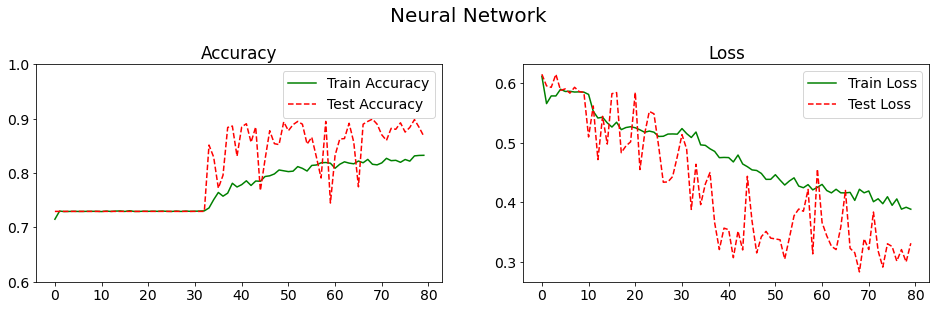

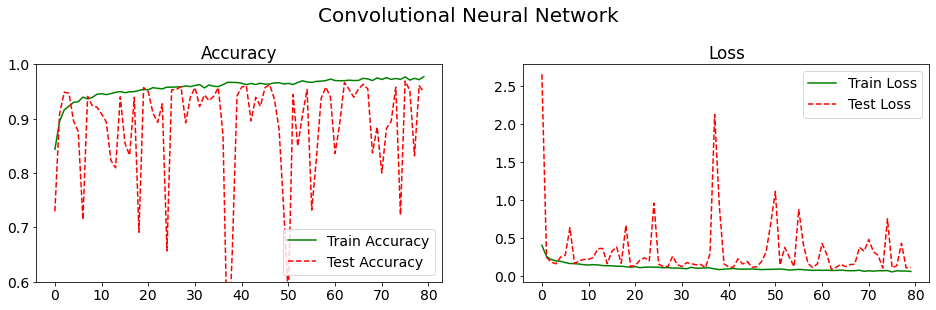

In [20]:
def plot_accuracy_hist(model_history, fig_tittle):

    plt.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize = (16, 4))
    columns = 2
    rows = 1

    fig.suptitle(fig_tittle, fontsize = 20, y = 1.08)
    fig.add_subplot(rows, columns, 1)

    plt.title('Accuracy')
    plt.ylim(0.6, 1)
    
    plt.plot(model_history.history['accuracy'], 
             color='green', 
             label = 'Train Accuracy')

    plt.plot(model_history.history['val_accuracy'], 
             color='red', 
             label = 'Test Accuracy', 
             linestyle='dashed')

    plt.legend()

    fig.add_subplot(rows, columns, 2)

    plt.title('Loss')
    plt.plot(model_history.history['loss'], 
             color='green', 
             label = 'Train Loss')

    plt.plot(model_history.history['val_loss'], 
             color='red', 
             label = 'Test Loss', 
             linestyle='dashed')

    plt.legend()

    plt.show()
    
plot_accuracy_hist(history_NN, 'Neural Network')
plot_accuracy_hist(history_CNN, 'Convolutional Neural Network')

Uma matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou "classificador") em um conjunto de dados de teste pelos quais os valores verdadeiros são conhecidos.

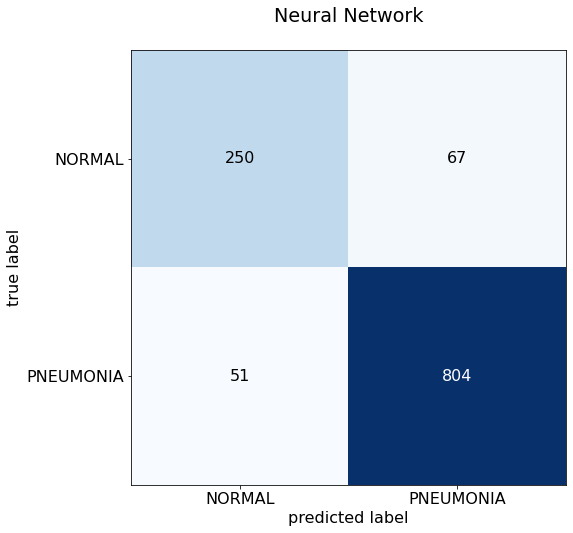

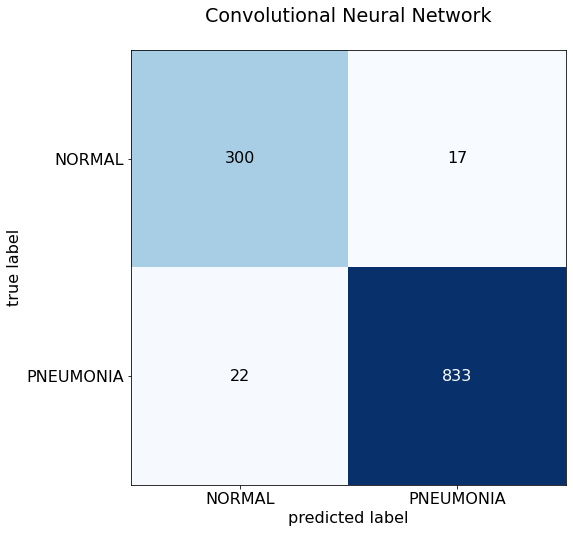

In [21]:
plt.rcParams.update({'font.size': 16})

def plot_confusion_mtx(model, x_test, plot_tittle):
    pred_prob = model.predict(x_test, batch_size = 8)
    pred = np.where(pred_prob > 0.5, 1,0)

    CM = confusion_matrix(y_test, pred)

    plot_confusion_matrix(conf_mat = CM, figsize = (16, 8))
    plt.title(plot_tittle)
    plt.xticks(range(2), labels)
    plt.yticks(range(2), labels)

    plt.show()

plot_confusion_mtx(model_NN, x_test, 'Neural Network')
plot_confusion_mtx(model_CNN, x_test, 'Convolutional Neural Network')
    

**Receiver operating characteristic** é um gráfico que mostra a capacidade de discriminação de um modelo classificador binário à medida que seu limite de classificação muda.

Obtemos esse gráfico plotando a Taxa Positiva Verdadeira (TPR) contra a Taxa Positiva Falsa (FPR) em diferentes configurações de limite.

Quanto maior a Área sob a curva (AUC), melhor o modelo é para classificar a observação.

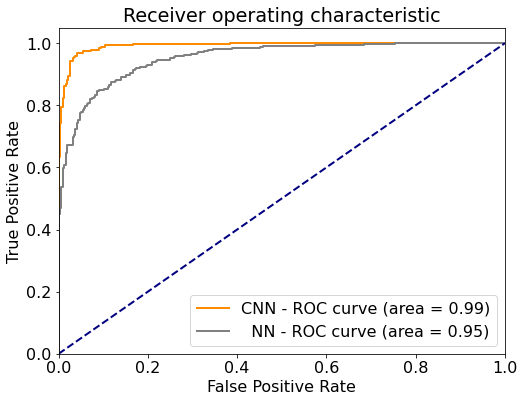

Classificarion Report - Neural Network
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       317
           1       0.92      0.94      0.93       855

    accuracy                           0.90      1172
   macro avg       0.88      0.86      0.87      1172
weighted avg       0.90      0.90      0.90      1172


Classificarion Report - Convolutional Neural Network
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       317
           1       0.98      0.97      0.98       855

    accuracy                           0.97      1172
   macro avg       0.96      0.96      0.96      1172
weighted avg       0.97      0.97      0.97      1172



In [22]:

pred_prob_NN  = model_NN.predict(x_test, batch_size = 8)
pred_prob_CNN = model_CNN.predict(x_test, batch_size = 8)

pred_NN  = np.where(pred_prob_NN > 0.5, 1,0)
pred_CNN = np.where(pred_prob_CNN > 0.5, 1,0)

NN_fpr, NN_tpr, _ = roc_curve(y_test, pred_prob_NN)
NN_roc_auc = auc(NN_fpr, NN_tpr)

CNN_fpr, CNN_tpr, _ = roc_curve(y_test, pred_prob_CNN)
CNN_roc_auc = auc(CNN_fpr, CNN_tpr)

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (8, 6))

lw = 2
plt.plot(CNN_fpr,
         CNN_tpr, 
         color = 'darkorange',
         lw = lw, 
         label = 'CNN - ROC curve (area = %0.2f)' % CNN_roc_auc)

plt.plot(NN_fpr,
         NN_tpr, 
         color = 'grey',
         lw = lw, 
         label = '  NN - ROC curve (area = %0.2f)' % NN_roc_auc)

plt.plot([0, 1], [0, 1], 
         color = 'navy', 
         lw = lw, 
         linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()

print('Classificarion Report - Neural Network')
print(classification_report(y_test, pred_NN))

print('\nClassificarion Report - Convolutional Neural Network')
print(classification_report(y_test, pred_CNN))


# Conclusão

to do ...

# Referências utilizadas

- [Uma introdução as redes neurais convolucionais utilizando o Keras](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e), por [Alan Melo Clappis](https://medium.com/@clappis)

- [CNN- Tensorflow 2.0 ( F-Score 97%, Recall -98%)](https://www.kaggle.com/arjunsarkar/cnn-tensorflow-2-0-f-score-97-recall-98), por [Arjun Sarkar](https://www.kaggle.com/arjunsarkar)

- [Batch normalization in Neural Networks](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c), por [FD](https://towardsdatascience.com/@phidaouss)

- [Tensorflow 2.0 API Documentation](https://www.tensorflow.org/api_docs)

- [Scikit-Learn - Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)